In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
path = '../input/household-income/DataHD98_4.csv'

In [3]:
library(tidyverse)
library(reshape2)
library(dplyr)
library(scales)
library(ggplot2) 
library(ggcorrplot)
library(GGally)
library(ggthemes)
library(ggThemeAssist)

In [4]:
df = read_csv(path)
attach(df)
data = as.data.frame(df)
dim(data)
summary(data)
options(scipen=999, digits = 10)
attach(data)
data=data[,-c(35,38,46)]
sum(is.na(data))/prod(dim(data))
colnames(data)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  cooler.g = col_logical(),
  ab.l = col_logical(),
  broodat.m = col_logical()
)
ℹ Use `spec()` for the full column specifications.




[1] 2296   68

    Address             C.Ostan         Tedad.a           Gender     
 Min.   :1.230e+10   Min.   :23.00   Min.   : 1.000   Min.   :1.000  
 1st Qu.:1.230e+10   1st Qu.:23.00   1st Qu.: 2.000   1st Qu.:1.000  
 Median :1.231e+10   Median :23.00   Median : 3.000   Median :1.000  
 Mean   :1.249e+10   Mean   :24.81   Mean   : 3.254   Mean   :1.125  
 3rd Qu.:1.260e+10   3rd Qu.:26.00   3rd Qu.: 4.000   3rd Qu.:1.000  
 Max.   :1.301e+10   Max.   :30.00   Max.   :10.000   Max.   :2.000  
                                                                     
      Age            Savad           InEdu            Edu       
 Min.   :21.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:40.00   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :50.00   Median :1.000   Median :2.000   Median :4.000  
 Mean   :51.09   Mean   :1.105   Mean   :1.987   Mean   :3.364  
 3rd Qu.:61.00   3rd Qu.:1.000   3rd Qu.:2.000   3rd Qu.:4.000  
 Max.   :96.00   Max.   :2.000   Max.   :2.000   M

The following objects are masked from df:

    ab.l, Address, Age, ashpazkhane, bargh, broodat.m, C.Ostan,
    charkh.kh, cooler.a, cooler.a.s, cooler.g, cooler.g.s, D_Azad,
    D_Motefaraghe, D_Mozd, D_Yarane, do, DVD, Edu, Faaliat, fazelab,
    freeizer, gaz, gaz.l, Gender, H_behdasht, H_Ertebatat,
    H_Ghazayeamade, H_Hamlonaghl, H_kalavakhadamat, H_Khorakivadokhani,
    H_Maskan, H_mobleman, H_Noshidani, H_Pushak, H_Tafrihat, hamam,
    hararat.m, InEdu, internet, jaro.b, m.lebas, m.zarf, Masleh,
    microfer, mobile, motor, N.S, oto, package, panke, Pc, radio, S.Z,
    Savad, sookht.ab, sookht.g, sookht.p, T.M.S, T.O, T.shaghel,
    Tedad.a, tel, TV.r, TV.S, yakhchal, yakhchal.f, zabt




[1] 0.3512463147

[1] "Address"            "C.Ostan"            "Tedad.a"           
 [4] "Gender"             "Age"                "Savad"             
 [7] "InEdu"              "Edu"                "Faaliat"           
[10] "T.shaghel"          "T.M.S"              "T.O"               
[13] "S.Z"                "N.S"                "Masleh"            
[16] "oto"                "motor"              "do"                
[19] "radio"              "zabt"               "TV.S"              
[22] "TV.r"               "DVD"                "Pc"                
[25] "mobile"             "freeizer"           "yakhchal"          
[28] "yakhchal.f"         "gaz"                "jaro.b"            
[31] "m.lebas"            "charkh.kh"          "panke"             
[34] "cooler.a"           "m.zarf"             "microfer"          
[37] "bargh"              "gaz.l"              "tel"               
[40] "internet"           "hamam"              "ashpazkhane"       
[43] "cooler.a.s"         "hararat.m"          "package"           
[46] "cooler.g.s"         "fazelab"            "sookht.p"          
[49] "sookht.g"           "sookht.ab"          "H_Khorakivadokhani"
[52] "H_Noshidani"        "H_Pushak"           "H_Maskan"          
[55] "H_mobleman"         "H_behdasht"         "H_Hamlonaghl"      
[58] "H_Ertebatat"        "H_Tafrihat"         "H_Ghazayeamade"    
[61] "H_kalavakhadamat"   "D_Mozd"             "D_Azad"            
[64] "D_Motefaraghe"      "D_Yarane"

In [5]:
summary(data$oto)
data$oto[is.na(data$oto)]=0
summary(data$motor)
data$motor[is.na(data$motor)]=0
summary(data$do)
data$do[is.na(data$do)]=0
summary(data$radio)
data$radio[is.na(data$radio)]=0
summary(data$zabt)
data$zabt[is.na(data$zabt)]=0
summary(data$TV.S)
data$TV.S[is.na(data$TV.S)]=0
summary(data$TV.r)
data$TV.r[is.na(data$TV.r)]=0
summary(data$DVD)
data$DVD[is.na(data$DVD)]=0
summary(data$Pc)
data$Pc[is.na(data$Pc)]=0
summary(data$mobile)
data$mobile[is.na(data$mobile)]=0
summary(data$freeizer)
data$freeizer[is.na(data$freeizer)]=0
summary(data$yakhchal)
data$yakhchal[is.na(data$yakhchal)]=0
summary(data$yakhchal.f)
data$yakhchal.f[is.na(data$yakhchal.f)]=0
summary(data$gaz)
data$gaz[is.na(data$gaz)]=0
summary(data$jaro.b)
data$jaro.b[is.na(data$jaro.b)]=0
summary(data$m.lebas)
data$m.lebas[is.na(data$m.lebas)]=0
summary(data$charkh.kh)
data$charkh.kh[is.na(data$charkh.kh)]=0
summary(data$panke)
data$panke[is.na(data$panke)]=0
summary(data$cooler.a)
data$cooler.a[is.na(data$cooler.a)]=0
summary(data$m.zarf)
data$m.zarf[is.na(data$m.zarf)]=0
summary(data$microfer)
data$microfer[is.na(data$microfer)]=0
summary(data$tel)
data$tel[is.na(data$tel)]=0
summary(data$internet)
data$internet[is.na(data$internet)]=0
summary(data$hamam)
data$hamam[is.na(data$hamam)]=0
summary(data$ashpazkhane)
data$ashpazkhane[is.na(data$ashpazkhane)]=0
summary(data$cooler.a.s)
data$cooler.a.s[is.na(data$cooler.a.s)]=0
summary(data$hararat.m)
data$hararat.m[is.na(data$hararat.m)]=0
summary(data$package)
data$package[is.na(data$package)]=0
summary(data$cooler.g.s)
data$cooler.g.s[is.na(data$cooler.g.s)]=0
summary(data$fazelab)
data$fazelab[is.na(data$fazelab)]=0
summary(data$H_Noshidani)
data$H_Noshidani[is.na(data$H_Noshidani)]=0
summary(data$H_Pushak)
data$H_Pushak[is.na(data$H_Pushak)]=0
summary(data$H_mobleman)
data$H_mobleman[is.na(data$H_mobleman)]=0
summary(data$H_behdasht)
data$H_behdasht[is.na(data$H_behdasht)]=0
summary(data$H_Hamlonaghl)
data$H_Hamlonaghl[is.na(data$H_Hamlonaghl)]=0
summary(data$H_Ertebatat)
data$H_Ertebatat[is.na(data$H_Ertebatat)]=0
summary(data$H_Tafrihat)
data$H_Tafrihat[is.na(data$H_Tafrihat)]=0
summary(data$H_Ghazayeamade)
data$H_Ghazayeamade[is.na(data$H_Ghazayeamade)]=0
summary(data$H_kalavakhadamat)
data$H_kalavakhadamat[is.na(data$H_kalavakhadamat)]=0
summary(data$D_Mozd)
data$D_Mozd[is.na(data$D_Mozd)]=0
summary(data$D_Azad)
data$D_Azad[is.na(data$D_Azad)]=0
summary(data$D_Motefaraghe)
data$D_Motefaraghe[is.na(data$D_Motefaraghe)]=0
summary(data$D_Yarane)
data$D_Yarane[is.na(data$D_Yarane)]=0
data=data[-which(is.na(data$H_Khorakivadokhani)),]


all(which(is.na(data$Edu)) == which(data$Savad==2))
all(which(is.na(data$InEdu)) == which(data$Savad==2))
data$InEdu[which(is.na(data$InEdu))]=0
data$Edu[which(is.na(data$Edu))]=0

data$T.shaghel[which(is.na(data$T.shaghel))]=0

all(which(is.na(data$Masleh)) == which(data$N.S==1 | data$N.S==2))
data$Masleh[which(data$N.S==1)]=3
data$Masleh[which(data$N.S==2)]=5


data$C.Ostan[data$C.Ostan==23]='Tehran'
data$C.Ostan[data$C.Ostan==26]='Qazvin'
data$C.Ostan[data$C.Ostan==30]='Alborz'
unique(data$C.Ostan)

data$Gender[data$Gender==1]='Male'
data$Gender[data$Gender==2]='Female'
unique(data$Gender)

data$Savad[data$Savad==1]='Ba Savad'
data$Savad[data$Savad==2]='Bi Savad'
unique(data$Savad)
data$InEdu[data$InEdu==0]='Bi Savad'
data$InEdu[data$InEdu==1]='Yes'
data$InEdu[data$InEdu==2]='No'

data$Edu[data$Edu==0]='Bi Savad'
data$Edu[data$Edu==1]='Ebtedayi'
data$Edu[data$Edu==2]='Rahnamayi'
data$Edu[data$Edu==3]='Motevaseteh'
data$Edu[data$Edu==4]='Diplom'
data$Edu[data$Edu==5]='Kardani'
data$Edu[data$Edu==6]='Karshenasi'
data$Edu[data$Edu==7]='Karshenasi Arshad'
data$Edu[data$Edu==8]='Doctora'
data$Edu[data$Edu==9]='Saayer'

data$Faaliat[data$Faaliat==1]='Shaaghel'
data$Faaliat[data$Faaliat==2]='Bikaar Ba Daramad'
data$Faaliat[data$Faaliat==3]='Bikaar'
data$Faaliat[data$Faaliat==5]='Khanedar'
data$Faaliat[data$Faaliat==6]='Saayer'
data$Faaliat[which(data$Faaliat=='Bikaar' & data$D_Mozd>0)]='Bikaar Ba Daramad'


data$T.M.S[data$T.M.S==1]='Arse va Ayan'
data$T.M.S[data$T.M.S==2]='Ayan'
data$T.M.S[data$T.M.S==3]='Ejaari'
data$T.M.S[data$T.M.S==4]='Rahn'
data$T.M.S[data$T.M.S==5]='Khedmat'
data$T.M.S[data$T.M.S==6]='Raygan'
data$T.M.S[data$T.M.S==7]='Saayer'

data$N.S[data$N.S==1]='Felezi'
data$N.S[data$N.S==2]='Beton'
data$N.S[data$N.S==3]='Saayer'

data$Masleh[data$Masleh==1]='Ajor va Ahan/Sang va Ahan'
data$Masleh[data$Masleh==2]='Ajor va Choob/Sang va Choob'
data$Masleh[data$Masleh==4]='Tamam Ajor/Sang va Ajor'
data$Masleh[data$Masleh==6]='Khesht va Choob'
length(data$Masleh)
data$sookht.p[data$sookht.p==4]='Gaz e TabiE'
data$sookht.p[data$sookht.p==5]='Bargh'
data$sookht.g[data$sookht.g==14]='Gaz e TabiE'
data$sookht.g[data$sookht.g==15]='Bargh'
data$sookht.ab[data$sookht.ab==24]='Gaz e TabiE'
data$sookht.ab[data$sookht.ab==25]='Bargh'

data$H_Khorakivadokhani=data$H_Khorakivadokhani/10000
data$H_Noshidani=data$H_Noshidani/10000
data$H_Pushak=data$H_Pushak/10000
data$H_Maskan=data$H_Maskan/10000
data$H_mobleman=data$H_mobleman/10000
data$H_behdasht=data$H_behdasht/10000
data$H_Hamlonaghl=data$H_Hamlonaghl/10000
data$H_Ertebatat=data$H_Ertebatat/10000
data$H_Tafrihat=data$H_Tafrihat/10000
data$H_Ghazayeamade=data$H_Ghazayeamade/10000
data$H_kalavakhadamat=data$H_kalavakhadamat/10000
data$D_Mozd=data$D_Mozd/10000
data$D_Azad=data$D_Azad/10000
data$D_Motefaraghe=data$D_Motefaraghe/10000
data$D_Yarane=data$D_Yarane/10000
data$D_Mozd=data$D_Mozd/12
data$D_Azad=data$D_Azad/12
data$D_Motefaraghe=data$D_Motefaraghe/12
data$D_Yarane=data$D_Yarane/12

data=data[-c(77,104),]
data$H_Kol=data$H_behdasht+data$H_Ertebatat+data$H_Ghazayeamade+data$H_Hamlonaghl+data$H_kalavakhadamat+data$H_Khorakivadokhani+data$H_Maskan+data$H_mobleman+data$H_Noshidani+data$H_Pushak+data$H_Tafrihat
data$H_Kol_log=log(data$H_Kol)

data$D_Kol=data$D_Azad+data$D_Motefaraghe+data$D_Mozd+data$D_Yarane
data$D_Kol_log=log(data$D_Kol)

data$Dahak=data$D_Kol
data$Dahak[which(data$D_Kol>quantile(data$D_Kol,probs = 0.7))]='Por Daramad'
data$Dahak[which(data$D_Kol<=quantile(data$D_Kol,probs = 0.7))]='Kam Daramad'

data$oto=as.factor(data$oto)
data$motor=as.factor(data$motor)
data$do=as.factor(data$do)
data$radio=as.factor(data$radio)
data$zabt=as.factor(data$zabt)
data$TV.S=as.factor(data$TV.S)
data$TV.r=as.factor(data$TV.r)
data$DVD=as.factor(data$DVD)
data$Pc=as.factor(data$Pc)
data$mobile=as.factor(data$mobile)
data$freeizer=as.factor(data$freeizer)
data$yakhchal=as.factor(data$yakhchal)
data$yakhchal.f=as.factor(data$yakhchal.f)
data$gaz=as.factor(data$gaz)
data$jaro.b=as.factor(data$jaro.b)
data$m.lebas=as.factor(data$m.lebas)
data$charkh.kh=as.factor(data$charkh.kh)
data$panke=as.factor(data$panke)
data$cooler.a=as.factor(data$cooler.a)
data$m.zarf=as.factor(data$m.zarf)
data$microfer=as.factor(data$microfer)
data$bargh=as.factor(data$bargh)
data$gaz.l=as.factor(data$gaz.l)
data$tel=as.factor(data$tel)
data$internet=as.factor(data$internet)
data$hamam=as.factor(data$hamam)
data$ashpazkhane=as.factor(data$ashpazkhane)
data$cooler.a.s=as.factor(data$cooler.a.s)
data$hararat.m=as.factor(data$hararat.m)
data$package=as.factor(data$package)
data$cooler.g.s=as.factor(data$cooler.g.s)
data$fazelab=as.factor(data$fazelab)
data$sookht.ab=as.factor(data$sookht.ab)
data$sookht.p=as.factor(data$sookht.p)
data$sookht.g=as.factor(data$sookht.g)
data$C.Ostan=as.factor(data$C.Ostan)
data$Savad=as.factor(data$Savad)
data$InEdu=as.factor(data$InEdu)
data$Edu=as.factor(data$Edu)
data$Faaliat=as.factor(data$Faaliat)
data$T.M.S=as.factor(data$T.M.S)
data$N.S=as.factor(data$N.S)
data$Masleh=as.factor(data$Masleh)
data$Gender=as.factor(data$Gender)
data$Dahak[data$Dahak=='Por Daramad']=1
data$Dahak[data$Dahak=='Kam Daramad']=0
data$Dahak=as.factor(data$Dahak)
summary(data)
data=data[,-c(1,66,67,68,69)]
data=data[,-c(61,62,63,64)]
data=data[,-c(36,37)]
colnames(data)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1038 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2074 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2073 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2269 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2114 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2289 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1      30 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1371 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1459 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1      97 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1817 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1692 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     600 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1      15 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1      85 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     175 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1293 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2079 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2275 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2044 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1863 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1       3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     584 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     722 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1       7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     231 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1922 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1845 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2195 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1317 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   25000   600000  1240000  1474976  2000000 12000000     1835 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    20000    700000   1600000   3070531   3500000 138000000      1486 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
   35000.0   391250.0   593500.0   875753.2   920000.0 85430000.0        298 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    10000    600000   1300000   3891430   3400000 200000000       817 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   24000   780000  1420000  2072762  2500000 87800000       95 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
   20000.0   500000.0   800000.0   977294.2  1228000.0 13050000.0         27 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   20000   250000   600000  1064670  1337500 10000000     1693 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    20000    430000    890000   2375640   2000000 350000000      1547 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   25000   400000   660000  1005248  1170000 51850000      114 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
         0  201630002  282900000  335434860  404025000 4267560000       1054 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
   7000000  189300000  280500000  319122261  367750000 2400000000       1584 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
         0   40790000  187000000  210956503  304250000 1800000000       1025 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
 3640000 10920000 16380000 17764565 21840000 43680000      389 

[1] TRUE

[1] TRUE

[1] TRUE

[1] "Tehran" "Qazvin" "Alborz"

[1] "Female" "Male"

[1] "Ba Savad" "Bi Savad"

[1] 2292

    Address              C.Ostan        Tedad.a             Gender    
 Min.   :12301265408   Alborz: 409   Min.   : 1.000000   Female: 282  
 1st Qu.:12301277712   Qazvin: 420   1st Qu.: 2.000000   Male  :2008  
 Median :12310289322   Tehran:1461   Median : 3.000000                
 Mean   :12484452190                 Mean   : 3.259389                
 3rd Qu.:12604322919                 3rd Qu.: 4.000000                
 Max.   :13006383823                 Max.   :10.000000                
                                                                      
      Age                Savad           InEdu                     Edu     
 Min.   :21.00000   Ba Savad:2051   Bi Savad: 239   Diplom           :595  
 1st Qu.:40.00000   Bi Savad: 239   No      :2025   Ebtedayi         :496  
 Median :50.00000                   Yes     :  26   Rahnamayi        :442  
 Mean   :51.04629                                   Karshenasi       :265  
 3rd Qu.:61.00000                                   

[1] "C.Ostan"            "Tedad.a"            "Gender"            
 [4] "Age"                "Savad"              "InEdu"             
 [7] "Edu"                "Faaliat"            "T.shaghel"         
[10] "T.M.S"              "T.O"                "S.Z"               
[13] "N.S"                "Masleh"             "oto"               
[16] "motor"              "do"                 "radio"             
[19] "zabt"               "TV.S"               "TV.r"              
[22] "DVD"                "Pc"                 "mobile"            
[25] "freeizer"           "yakhchal"           "yakhchal.f"        
[28] "gaz"                "jaro.b"             "m.lebas"           
[31] "charkh.kh"          "panke"              "cooler.a"          
[34] "m.zarf"             "microfer"           "tel"               
[37] "internet"           "hamam"              "ashpazkhane"       
[40] "cooler.a.s"         "hararat.m"          "package"           
[43] "cooler.g.s"         "fazelab"            "sookht.p"          
[46] "sookht.g"           "sookht.ab"          "H_Khorakivadokhani"
[49] "H_Noshidani"        "H_Pushak"           "H_Maskan"          
[52] "H_mobleman"         "H_behdasht"         "H_Hamlonaghl"      
[55] "H_Ertebatat"        "H_Tafrihat"         "H_Ghazayeamade"    
[58] "H_kalavakhadamat"   "Dahak"

In [6]:
set.seed(1)
train.index=sample(c(1:dim(data)[1]), dim(data)[1]*0.6)
train.df=data[train.index,]
valid.df=data[-train.index,]


In [8]:
library(rpart.plot)
library(rpart)
library(rattle)
library(caret)
library(class)
library(dplyr)
library(e1071)
library(FNN) 
library(gmodels) 
library(psych)
library(RColorBrewer)

In [9]:
default.ct=rpart(Dahak~.,data=train.df,method='class')

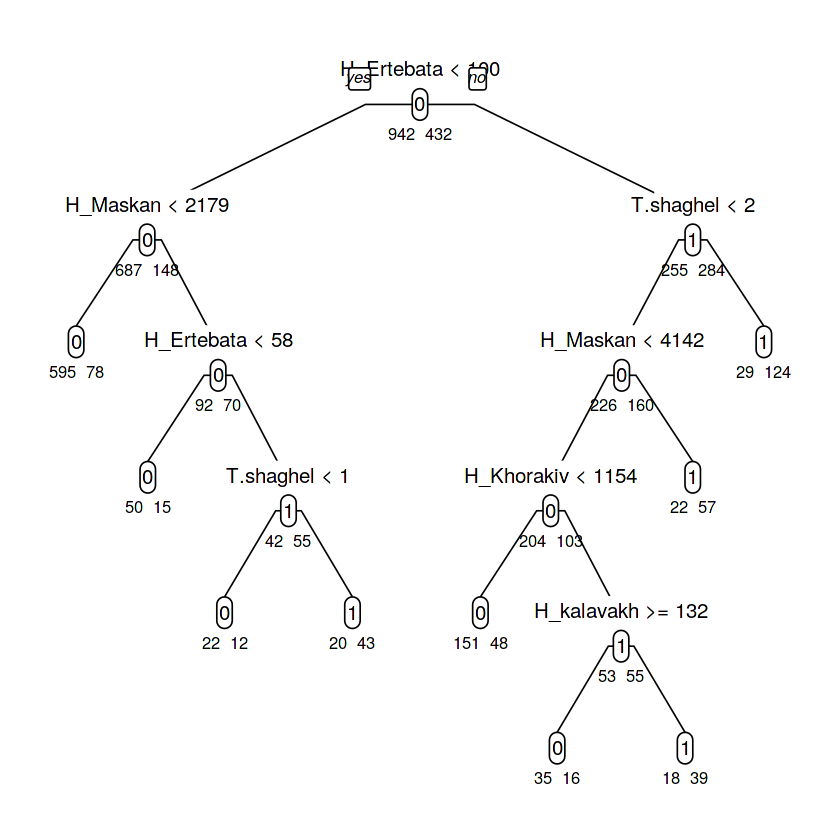

In [10]:
prp(default.ct,type=1,extra=1,under=TRUE,split.font=1,varlen=-10)

In [11]:
default.ct.point.pred.train <- predict(default.ct,train.df,type = "class")
confusionMatrix(default.ct.point.pred.train, train.df$Dahak)
default.ct.point.pred.valid <- predict(default.ct,valid.df,type = "class")
confusionMatrix(default.ct.point.pred.valid, valid.df$Dahak)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 853 169
         1  89 263
                                                  
               Accuracy : 0.8122271               
                 95% CI : (0.7905542, 0.8325556)  
    No Information Rate : 0.6855895               
    P-Value [Acc > NIR] : < 0.00000000000000022204
                                                  
                  Kappa : 0.5414597               
                                                  
 Mcnemar's Test P-Value : 0.0000008728783         
                                                  
            Sensitivity : 0.9055202               
            Specificity : 0.6087963               
         Pos Pred Value : 0.8346380               
         Neg Pred Value : 0.7471591               
             Prevalence : 0.6855895               
         Detection Rate : 0.6208151               
   Detection Prevalence : 0.7438137               
      Balanced Accuracy

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 580 120
         1  81 135
                                                
               Accuracy : 0.7805677             
                 95% CI : (0.7523402, 0.8069777)
    No Information Rate : 0.7216157             
    P-Value [Acc > NIR] : 0.00002741072         
                                                
                  Kappa : 0.4269226             
                                                
 Mcnemar's Test P-Value : 0.007355327           
                                                
            Sensitivity : 0.8774584             
            Specificity : 0.5294118             
         Pos Pred Value : 0.8285714             
         Neg Pred Value : 0.6250000             
             Prevalence : 0.7216157             
         Detection Rate : 0.6331878             
   Detection Prevalence : 0.7641921             
      Balanced Accuracy : 0.7034351             
        

In [12]:
deeper.ct=rpart(Dahak~.,data=train.df,method = 'class',cp=0,minsplit=1)


Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


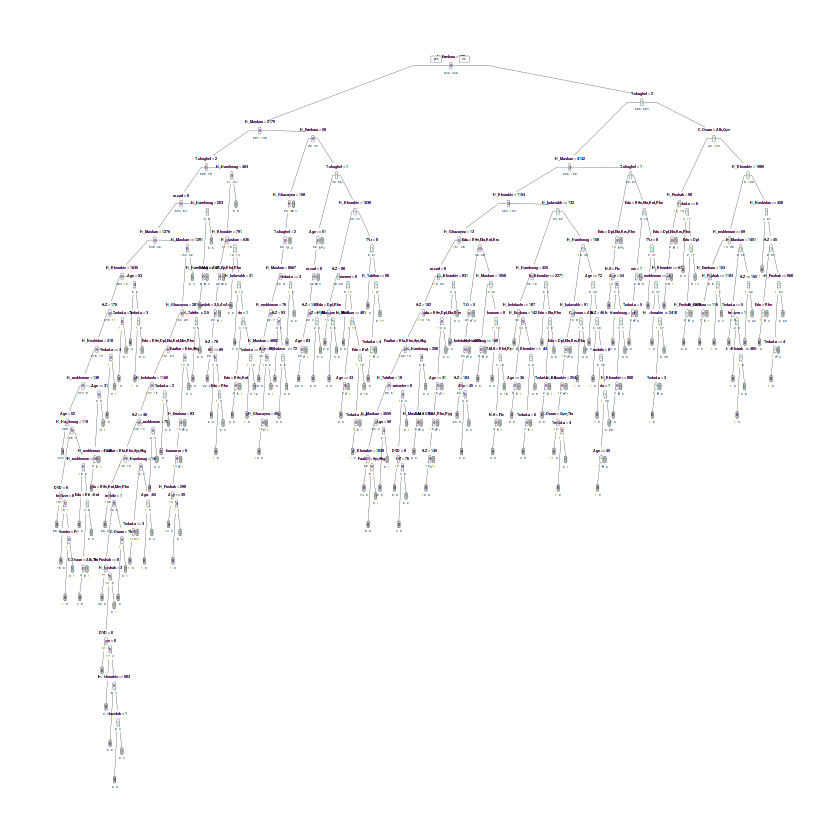

In [13]:
prp(deeper.ct,type=1,extra=1,under=TRUE,split.font=2,varlen=-10,box.col=ifelse(deeper.ct$frame$var == "<leaf>", 'gray', 'white'))


In [14]:
cv.ct <- rpart(Dahak ~ ., data = train.df, method = "class",cp = 0.00001, minsplit = 5, xval=5) 
printcp(cv.ct)



Classification tree:
rpart(formula = Dahak ~ ., data = train.df, method = "class", 
    cp = 0.00001, minsplit = 5, xval = 5)

Variables actually used in tree construction:
 [1] Age                C.Ostan            do                 Edu               
 [5] Faaliat            H_behdasht         H_Ertebatat        H_Ghazayeamade    
 [9] H_Hamlonaghl       H_kalavakhadamat   H_Khorakivadokhani H_Maskan          
[13] H_mobleman         H_Noshidani        H_Pushak           H_Tafrihat        
[17] hamam              internet           m.zarf             microfer          
[21] mobile             N.S                oto                S.Z               
[25] T.M.S              T.O                T.shaghel          Tedad.a           

Root node error: 432/1374 = 0.31441048

n= 1374 

              CP nsplit  rel error     xerror        xstd
1  0.10995370370      0 1.00000000 1.00000000 0.039837329
2  0.08101851852      2 0.78009259 0.83333333 0.037730548
3  0.02430555556      3 0.69907407

In [15]:
pruned.ct <- prune(cv.ct,cp = cv.ct$cptable[which.min(cv.ct$cptable[,"xerror"]),"CP"]) 
length(pruned.ct$frame$var[pruned.ct$frame$var == "<leaf>"]) 


[1] 20

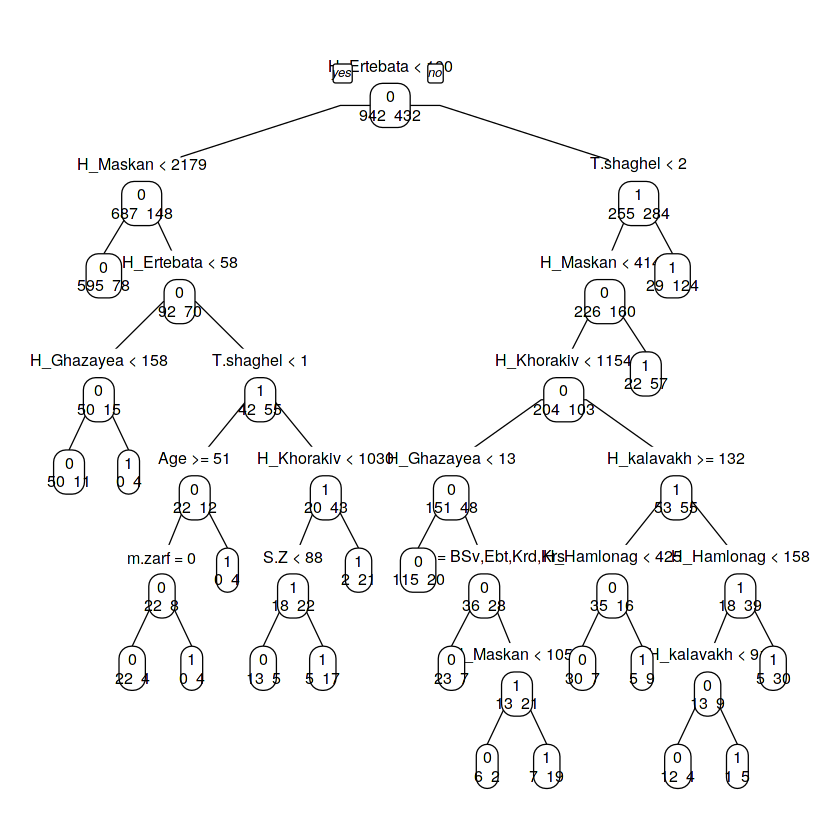

In [16]:
prp(pruned.ct, type = 1, extra = 1, split.font = 1, varlen = -10)

In [17]:
pruned.ct.point.pred.train <- predict(pruned.ct,train.df,type = "class")
confusionMatrix(pruned.ct.point.pred.train, train.df$Dahak)
pruned.ct.point.pred.valid <- predict(pruned.ct,valid.df,type = "class")
confusionMatrix(pruned.ct.point.pred.valid, valid.df$Dahak)


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 866 138
         1  76 294
                                                  
               Accuracy : 0.8442504               
                 95% CI : (0.8239799, 0.8630359)  
    No Information Rate : 0.6855895               
    P-Value [Acc > NIR] : < 0.00000000000000022204
                                                  
                  Kappa : 0.6241237               
                                                  
 Mcnemar's Test P-Value : 0.00003047679           
                                                  
            Sensitivity : 0.9193206               
            Specificity : 0.6805556               
         Pos Pred Value : 0.8625498               
         Neg Pred Value : 0.7945946               
             Prevalence : 0.6855895               
         Detection Rate : 0.6302766               
   Detection Prevalence : 0.7307132               
      Balanced Accuracy

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 557 110
         1 104 145
                                                
               Accuracy : 0.7663755             
                 95% CI : (0.7375957, 0.7934307)
    No Information Rate : 0.7216157             
    P-Value [Acc > NIR] : 0.001210274           
                                                
                  Kappa : 0.4142838             
                                                
 Mcnemar's Test P-Value : 0.732506705           
                                                
            Sensitivity : 0.8426626             
            Specificity : 0.5686275             
         Pos Pred Value : 0.8350825             
         Neg Pred Value : 0.5823293             
             Prevalence : 0.7216157             
         Detection Rate : 0.6080786             
   Detection Prevalence : 0.7281659             
      Balanced Accuracy : 0.7056450             
        